In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
#data preprocessing
from sklearn.preprocessing import LabelEncoder

In [4]:
data=pd.read_csv('data_car.csv')
data

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [5]:
data.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [6]:
data.shape

(11914, 16)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [8]:
data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [9]:
data.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [12]:
data['Engine HP']= data['Engine HP'].fillna(data['Engine HP'].median())

In [13]:
data['Engine Cylinders']= data['Engine Cylinders'].fillna(data['Engine Cylinders'].median())

In [45]:
data['Number of Doors']= data['Number of Doors'].fillna(data['Number of Doors'].median())

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14264\919863259.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Number of Doors']= data['Number of Doors'].fillna(data['Number of Doors'].median())


In [14]:
data.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP               0
Engine Cylinders        0
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [15]:
data.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [16]:
cat_data=data.select_dtypes(include=['object','bool'])
cat_data

,Make,Model,Engine Fuel Type,Transmission Type,Driven_Wheels,Market Category,Vehicle Size,Vehicle Style
0,BMW,1 Series M,premium unleaded (required),MANUAL,rear wheel drive,"Factory Tuner,Luxury,High-Performance",Compact,Coupe
1,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,Performance",Compact,Convertible
2,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,High-Performance",Compact,Coupe
3,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,Performance",Compact,Coupe
4,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,Luxury,Compact,Convertible
...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,premium unleaded (required),AUTOMATIC,all wheel drive,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback
11910,Acura,ZDX,premium unleaded (required),AUTOMATIC,all wheel drive,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback
11911,Acura,ZDX,premium unleaded (required),AUTOMATIC,all wheel drive,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback
11912,Acura,ZDX,premium unleaded (recommended),AUTOMATIC,all wheel drive,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback


In [ ]:
#Exploratory data Analysis

In [40]:
#Label Encoding
le=LabelEncoder()
data['Engine Fuel Type']=le.fit_transform(data['Engine Fuel Type'])
data['Market Category']=le.fit_transform(data['Market Category'])
data['Make']=le.fit_transform(data['Make'])
data['Model']=le.fit_transform(data['Model'])
data['Transmission Type']=le.fit_transform(data['Transmission Type'])
data['Driven_Wheels']=le.fit_transform(data['Driven_Wheels'])
data['Vehicle Size']=le.fit_transform(data['Vehicle Size'])
data['Vehicle Style']=le.fit_transform(data['Vehicle Style'])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14264\4196162446.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Engine Fuel Type']=le.fit_transform(data['Engine Fuel Type'])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_14264\4196162446.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Market Category']=le.fit_transform(data['Market Category'])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_14264\4196162446.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [20]:
for col in ['Engine Fuel Type', 'Market Category']:
    data[col]=data[col].fillna(data[col].median())

In [46]:
#null values are removed here
data.isna().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [23]:
#finding duplicates

In [47]:
duplicates=data[data.duplicated()]
print('Duplicated rows:',duplicates)

Duplicated rows: Empty DataFrame
Columns: [Make, Model, Year, Engine Fuel Type, Engine HP, Engine Cylinders, Transmission Type, Driven_Wheels, Number of Doors, Market Category, Vehicle Size, Vehicle Style, highway MPG, city mpg, Popularity, MSRP]
Index: []


In [48]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,4,1,2011,8,335.0,6.0,3,3,2.0,38,0,8,26,19,3916,46135
1,4,0,2011,8,300.0,6.0,3,3,2.0,67,0,6,28,19,3916,40650
2,4,0,2011,8,300.0,6.0,3,3,2.0,64,0,8,28,20,3916,36350
3,4,0,2011,8,230.0,6.0,3,3,2.0,67,0,8,28,18,3916,29450
4,4,0,2011,8,230.0,6.0,3,3,2.0,63,0,6,28,18,3916,34500


In [49]:
data=data.drop_duplicates()

In [28]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,8,335.0,6.0,MANUAL,rear wheel drive,2.0,38,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,8,300.0,6.0,MANUAL,rear wheel drive,2.0,67,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,8,300.0,6.0,MANUAL,rear wheel drive,2.0,64,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,8,230.0,6.0,MANUAL,rear wheel drive,2.0,67,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,8,230.0,6.0,MANUAL,rear wheel drive,2.0,63,Compact,Convertible,28,18,3916,34500


In [29]:
data.shape

(11199, 16)

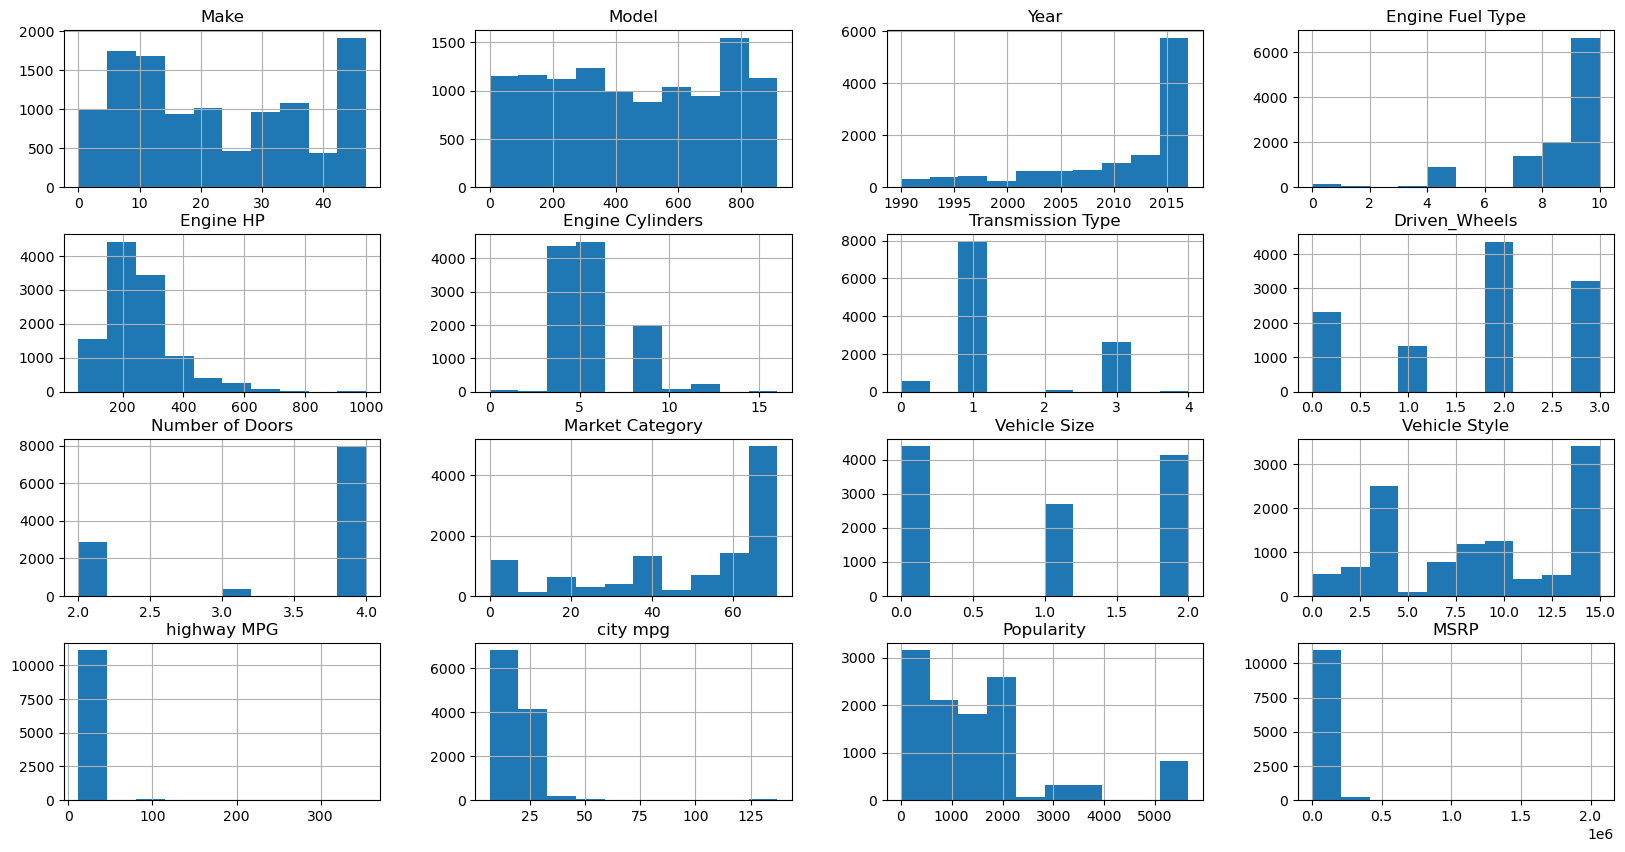

In [50]:
#Frequency graph
freqgraph=data.select_dtypes(include=['float','int'])
freqgraph.hist(figsize=(20,10))
plt.show()

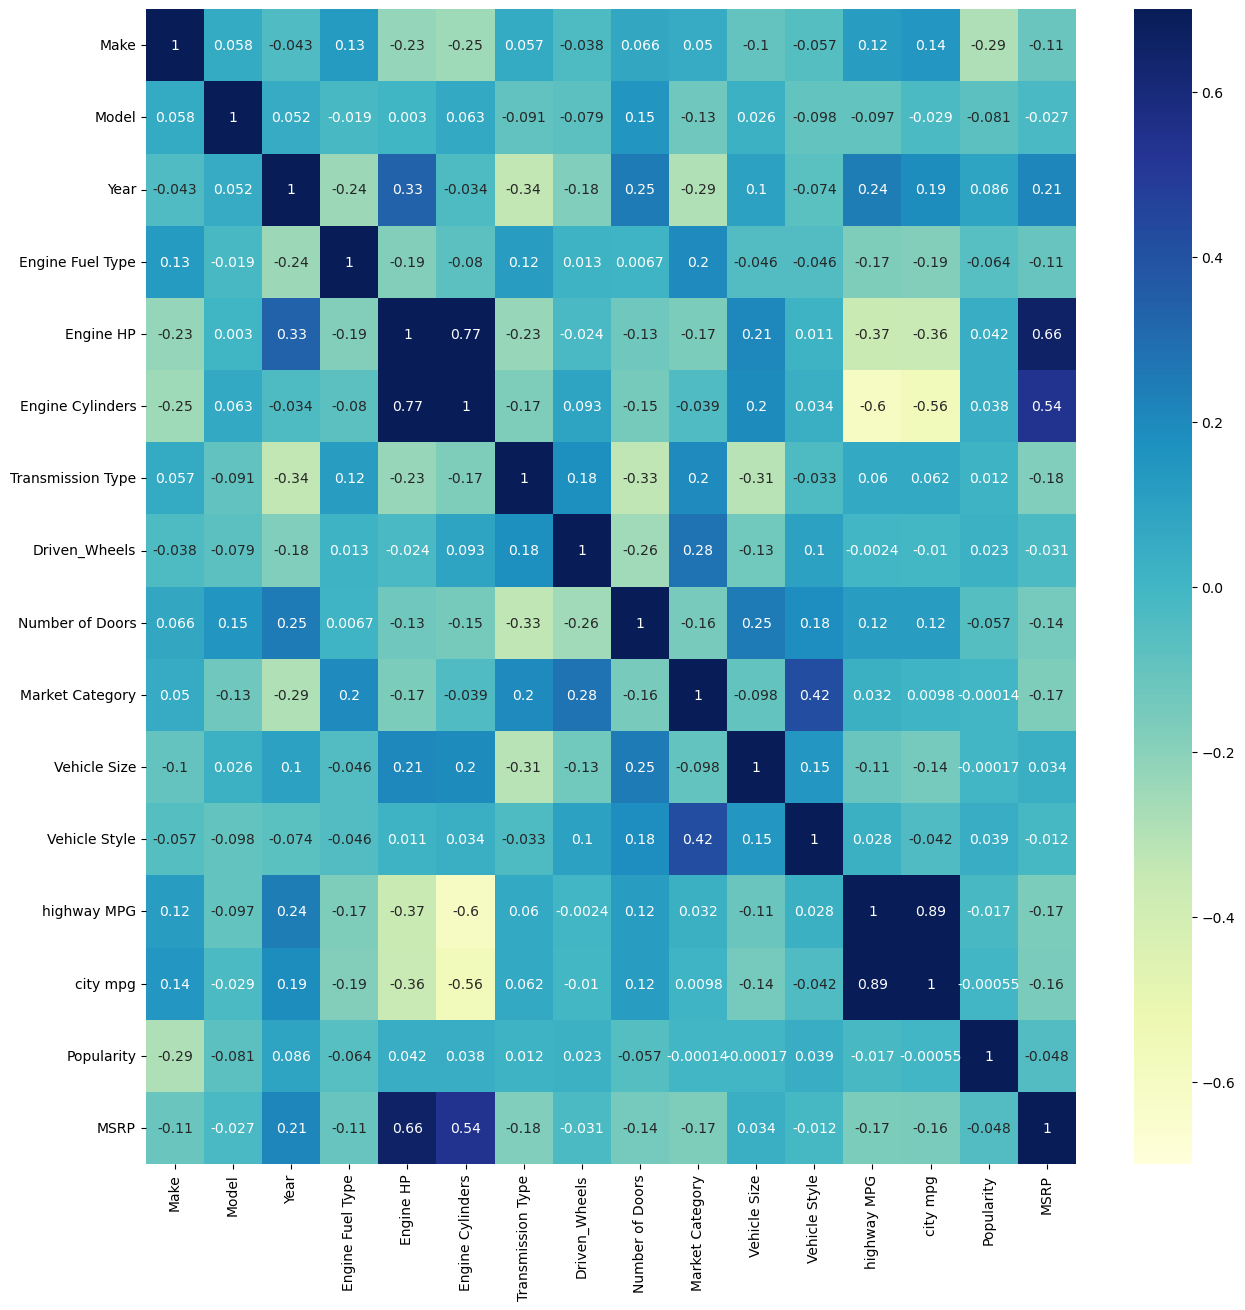

In [52]:
#Correlation matrix
corr_matrix=data.corr()
plt.subplots(figsize=(15,15))
sns.heatmap(corr_matrix,annot=True,vmax=0.7,vmin=-0.7,cmap='YlGnBu')
plt.show()

In [77]:
#Linear regression
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [80]:
y=data['MSRP']
x=data.drop(['MSRP'],axis=1)

In [82]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [83]:
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [97]:
from sklearn.metrics import mean_squared_error,r2_score
print ("MSE =",mean_squared_error(y_test,y_pred))
print ("R2 =",r2_score(y_test,y_pred))

MSE = 2772810686.3655586
R2 = 0.4277077017044222


In [98]:
#lasso Regression

In [99]:
from sklearn import datasets
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)
model1=lasso.fit(x_train, y_train)
lasso.score(x_test, y_test), lasso.score(x_train, y_train)
y_pred2=model1.predict(x_test)

In [100]:
from sklearn.metrics import mean_squared_error,r2_score
print ("MSE =",mean_squared_error(y_test,y_pred2))
print ("R2 =",r2_score(y_test,y_pred2))

MSE = 2772827813.2843833
R2 = 0.4277041668061383


In [ ]:
#Hyper parameter Tuning
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, make_scorer
from scipy.stats import randint

# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor()

# Define the parameter grid to search over
param_grid = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(5, 50),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)
}

# Define the scoring metric (e.g., mean squared error)
scoring = make_scorer(mean_squared_error)

# Perform randomized search over the parameter grid
random_search = RandomizedSearchCV(
    estimator=rf_regressor,
    param_distributions=param_grid,
    n_iter=10,  # Number of parameter settings that are sampled
    scoring=scoring,
    cv=5,  # Number of cross-validation folds
    random_state=42
)

# Fit the training data to the RandomizedSearchCV object
random_search.fit(x_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters: ", random_search.best_params_)

# Obtain the best model
best_model = random_search.best_estimator_

# Evaluate the model on test data
y_pred = best_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)